In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('datasets/bright_automotive_company.csv')

In [10]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [12]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [13]:
df.shape

(1581, 14)

In [14]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

# EDA -

In [15]:
df = df.fillna(method='bfill')

In [16]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [17]:
df.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

In [18]:
m = {'Femal', 'Female', 'Femle', 'Male'}

In [19]:
df['Gender'] = ['Female' if i in {'Femle', 'Femal'} else i for i in df['Gender']]

In [20]:
duplicates = df[df.duplicated()]

In [21]:
duplicates

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


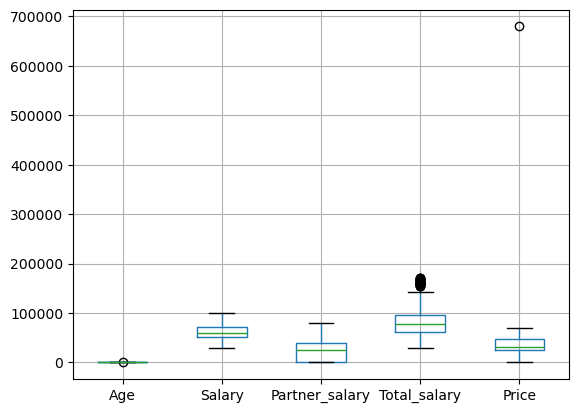

In [22]:
df.boxplot()
plt.show()

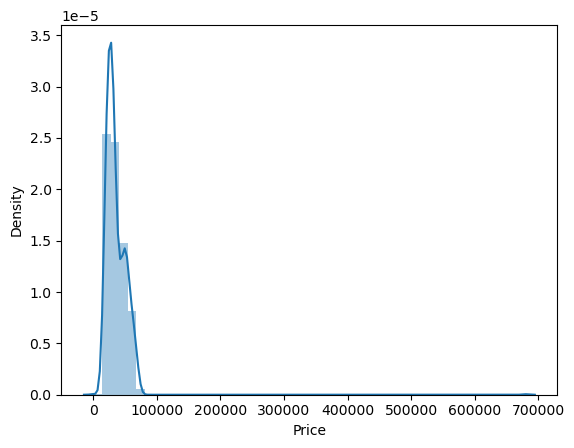

In [70]:
sns.distplot(df['Price'],kde = True)
plt.show()

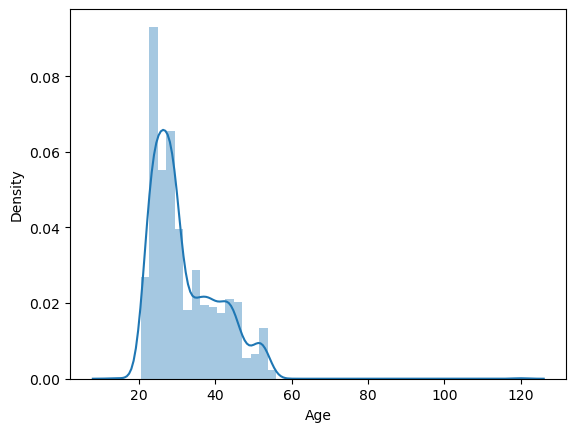

In [24]:
sns.distplot(df['Age'], kde = True)
plt.show()

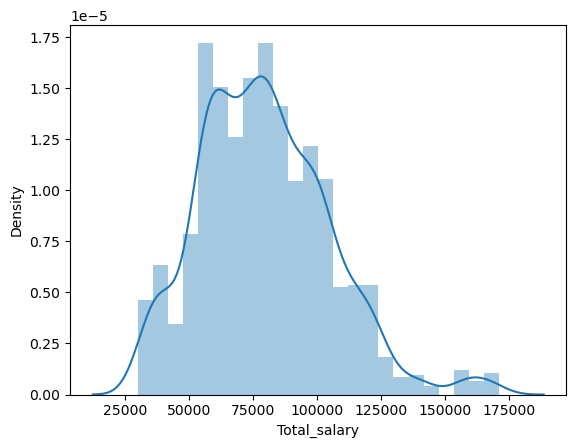

In [25]:
sns.distplot(df['Total_salary'], kde = True)
plt.show()

In [26]:
d = {}
for i in df:
    if df[i].dtype == 'object':
        try:
            print(i)
            temp = LabelEncoder()
            d[i] = temp
            df[i] = temp.fit_transform(df[i])
        except:
            print(i)

Gender
Profession
Marital_status
Education
No_of_Dependents
Personal_loan
House_loan
Partner_working
Make


In [27]:
print(df.dtypes)

Age                   int64
Gender                int64
Profession            int64
Marital_status        int64
Education             int64
No_of_Dependents      int64
Personal_loan         int64
House_loan            int64
Partner_working       int64
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                  int64
dtype: object


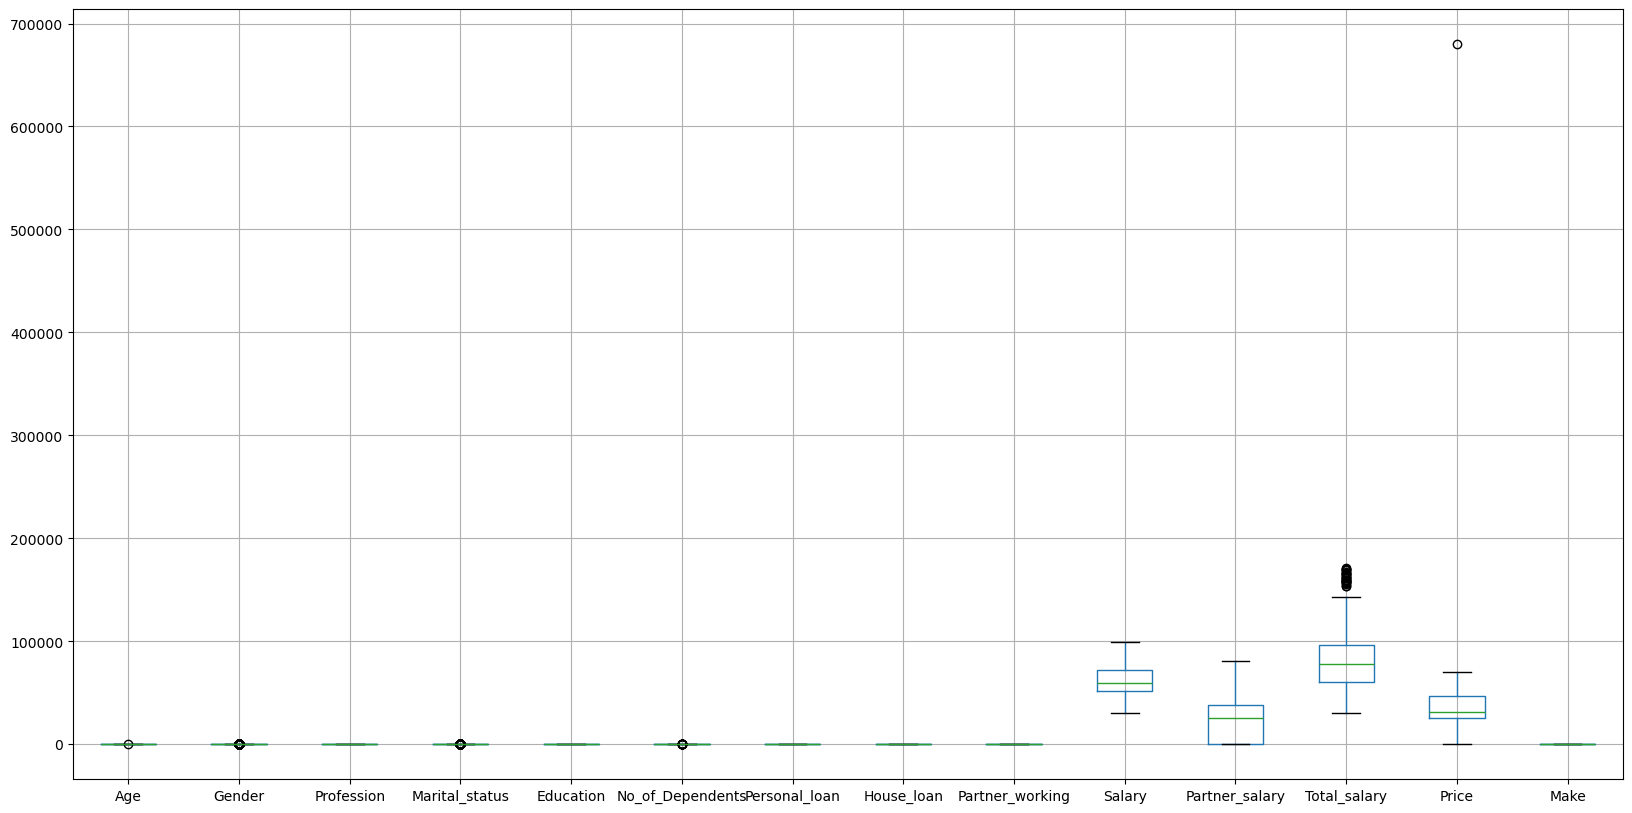

In [28]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

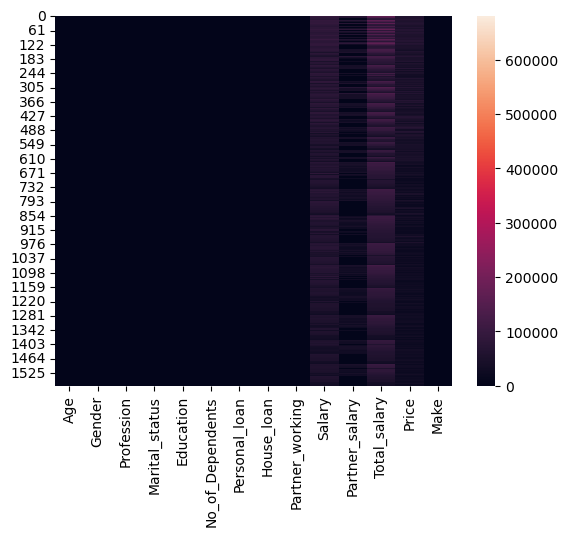

In [29]:
sns.heatmap(df)
plt.show()

In [30]:
df.corr()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
Age,1.000000,-0.459960,0.126520,-0.028418,0.009699,-0.172566,-0.075152,-0.192102,-0.019385,0.604745,0.152391,0.457876,0.528360,0.283588
Gender,-0.459960,1.000000,-0.115257,0.027300,0.035808,0.222505,0.043924,0.083466,0.011900,-0.208886,-0.078067,-0.173796,-0.316241,-0.185044
Profession,0.126520,-0.115257,1.000000,-0.050286,-0.025296,-0.028472,-0.049388,-0.000902,-0.013780,0.046066,0.012926,0.031055,0.105170,0.048630
Marital_status,-0.028418,0.027300,-0.050286,1.000000,0.032473,-0.278256,0.012859,-0.033276,-0.341210,-0.003977,-0.294950,-0.235466,-0.036083,-0.139590
Education,0.009699,0.035808,-0.025296,0.032473,1.000000,0.011635,-0.024627,-0.009229,-0.033532,0.630040,-0.040295,0.330285,0.001486,0.009748
No_of_Dependents,-0.172566,0.222505,-0.028472,-0.278256,0.011635,1.000000,-0.098475,-0.023623,0.146786,-0.029262,0.139108,0.097765,-0.074498,-0.314733
Personal_loan,-0.075152,0.043924,-0.049388,0.012859,-0.024627,-0.098475,1.000000,0.037569,-0.019890,-0.058669,-0.030200,-0.056732,-0.070573,0.047582
House_loan,-0.192102,0.083466,-0.000902,-0.033276,-0.009229,-0.023623,0.037569,1.000000,0.015280,-0.115069,-0.036939,-0.090059,-0.152674,-0.005460
Partner_working,-0.019385,0.011900,-0.013780,-0.341210,-0.033532,0.146786,-0.019890,0.015280,1.000000,-0.007461,0.864255,0.677809,0.001260,0.066750
Salary,0.604745,-0.208886,0.046066,-0.003977,0.630040,-0.029262,-0.058669,-0.115069,-0.007461,1.000000,0.093123,0.642115,0.287197,0.124296


## Descriptive Statistics -
### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [31]:
mean = df['Age'].sum()/df.shape[0] # Or df['Age'].mean()
mean

np.float64(31.952561669829223)

In [32]:
median = df['Age'].median()
median

29.0

In [33]:
std = df['Age'].std()
std

8.71254886208395

## Data Distribution -
### What is the distribution of gender in the dataset? Represent it using a pie chart.

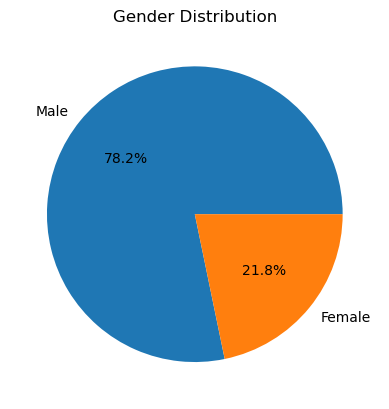

In [34]:
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=['Male','Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Correlation Analysis -
### Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [35]:
temp_df = df[['Age', 'Salary']]

In [36]:
temp_df

,Age,Salary
0,53,99300.0
1,53,95500.0
2,53,97300.0
3,53,72500.0
4,53,79700.0
...,...,...
1576,22,33300.0
1577,22,32000.0
1578,22,32900.0
1579,22,32200.0


In [37]:
temp_df.corr()

,Age,Salary
Age,1.000000,0.604745
Salary,0.604745,1.000000


sns.heatmap(temp_df)
plt.show()

## Salary Analysis -
### What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [38]:
avg_post_grad_salary = df[df['Education'] == 1]['Age'].mean()
avg_grad_salary = df[df['Education'] == 0]['Age'].mean()

In [39]:
avg_post_grad_salary, avg_grad_salary

(np.float64(32.018274111675126), np.float64(31.843959731543624))

## Loan Analysis -
### What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [40]:
loans = df[df["Personal_loan"] == 1]
no_loans = df[df["Personal_loan"] == 0]

In [41]:
f'{len(loans)/len(df)*100}%'

'50.094876660341555%'

In [42]:
f'{len(no_loans)/len(df)*100}%'

'49.905123339658445%'

In [43]:
# Men vs Women - 
men_loans = loans[loans['Gender'] == 1]
women_loans = loans[loans['Gender'] == 0]

men_no_loans = no_loans[no_loans['Gender'] == 1]
women_no_loans = no_loans[no_loans['Gender'] == 0]

In [44]:
len(men_loans)/len(loans)*100

80.05050505050505

In [45]:
len(women_loans)/len(loans)*100

19.94949494949495

In [46]:
len(men_no_loans)/len(no_loans)*100

76.42585551330798

In [47]:
len(women_no_loans)/len(no_loans)*100

23.574144486692013

## Marital Status and Dependents -
### What is the average number of dependents for married individuals versus single individuals?

In [58]:
dependents_married = df[df['Marital_status'] == 1]['No_of_Dependents']
dependents_unmarried = df[df['Marital_status'] == 0]['No_of_Dependents']


In [63]:
f"Avg married dependents: {dependents_married.sum()/len(dependents_married)}"

'Avg married dependents: 1.608695652173913'

In [64]:
f"Avg unmarried dependents: {dependents_unmarried.sum()/len(dependents_unmarried)}"

'Avg unmarried dependents: 2.541926541926542'

# Training a Logistic Regression Model -

In [65]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,1,0,0,1,4,0,0,1,99300.0,70700.0,170000,61000,2
1,53,0,1,0,1,4,1,0,1,95500.0,70300.0,165800,61000,2
2,53,0,1,0,1,3,0,0,1,97300.0,60700.0,158000,57000,2
3,53,0,1,0,0,5,1,0,1,72500.0,70300.0,142800,61000,0
4,53,1,1,0,1,3,0,0,1,79700.0,60200.0,139900,57000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,1,1,1,0,2,0,1,0,33300.0,0.0,33300,27000,1
1577,22,1,0,0,0,4,0,0,0,32000.0,0.0,32000,31000,1
1578,22,1,0,1,0,2,0,1,0,32900.0,0.0,32900,30000,1
1579,22,1,0,0,0,3,1,1,0,32200.0,0.0,32200,24000,1
